# 3장. 기초를 넘어서: 이미지에서 특징 감지하기

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.jupyter.org/github/rickiepark/aiml4coders/blob/main/ch03/03-1-fashion-mnist-with-cnn.ipynb"><img src="https://jupyter.org/assets/share.png" width="61" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/aiml4coders/blob/main/ch03/03-1-fashion-mnist-with-cnn.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

In [1]:
import tensorflow as tf

In [2]:
data = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = data.load_data()

In [3]:
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', 
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(training_images, training_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 16s 5ms/step - loss: 0.4381 - accuracy: 0.8385
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2993 - accuracy: 0.8899
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2497 - accuracy: 0.9061
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2171 - accuracy: 0.9187
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1882 - accuracy: 0.9294
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1652 - accuracy: 0.9387
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1454 - accuracy: 0.9452
Epoch 8/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1279 - accuracy: 0.9514
Epoch 9/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1130 - accuracy: 0.9574
Epoch 10/50
1875/1875 [==============================] - 10s 5ms/step - l

In [7]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 12ms/step - loss: 0.9467 - accuracy: 0.9128


[0.9466883540153503, 0.9128000140190125]

In [8]:
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

[0.0000000e+00 3.2350621e-25 0.0000000e+00 8.4674072e-27 0.0000000e+00
 1.3164827e-37 2.0222422e-18 8.7911589e-18 1.0922364e-28 1.0000000e+00]
9


## 합성곱 신경망 살펴 보기

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

## 말과 사람을 구별하는 CNN 만들기

### 케라스 ImageDataGenerator

In [10]:
import urllib.request
import zipfile

url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip"
file_name = "horse-or-human.zip"
training_dir = 'horse-or-human/training/'
urllib.request.urlretrieve(url, file_name)

zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 전체 이미지를 1./255로 스케일을 조정합니다.
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


### 말-사람 데이터셋을 위한 CNN 구조

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', 
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 35, 35, 64)      

In [14]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [15]:
history = model.fit_generator(train_generator, epochs=15)

<ipython-input-15-546877c22822>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=15)


Epoch 1/15
33/33 [==============================] - 39s 751ms/step - loss: 0.6389 - accuracy: 0.6563
Epoch 2/15
33/33 [==============================] - 11s 321ms/step - loss: 0.3071 - accuracy: 0.8968
Epoch 3/15
33/33 [==============================] - 10s 311ms/step - loss: 0.1650 - accuracy: 0.9396
Epoch 4/15
33/33 [==============================] - 10s 308ms/step - loss: 0.1257 - accuracy: 0.9503
Epoch 5/15
33/33 [==============================] - 10s 310ms/step - loss: 0.0880 - accuracy: 0.9757
Epoch 6/15
33/33 [==============================] - 10s 305ms/step - loss: 0.3954 - accuracy: 0.9698
Epoch 7/15
33/33 [==============================] - 10s 316ms/step - loss: 0.0548 - accuracy: 0.9776
Epoch 8/15
33/33 [==============================] - 11s 315ms/step - loss: 0.1215 - accuracy: 0.9786
Epoch 9/15
33/33 [==============================] - 10s 310ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 10/15
33/33 [==============================] - 10s 291ms/step - loss: 1.0066 - accura

### 검증 세트 추가하기

In [16]:
validation_url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip"

validation_file_name = "validation-horse-or-human.zip"
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(validation_url, validation_file_name)

zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

In [17]:
validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 256 images belonging to 2 classes.


In [18]:
history = model.fit_generator(
    train_generator,
    epochs=15,
    validation_data=validation_generator
)

<ipython-input-18-b4185029240c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
33/33 [==============================] - 13s 395ms/step - loss: 1.4937 - accuracy: 0.9747 - val_loss: 3.2098 - val_accuracy: 0.8086
Epoch 2/15
33/33 [==============================] - 12s 366ms/step - loss: 0.0267 - accuracy: 0.9932 - val_loss: 7.9444 - val_accuracy: 0.6719
Epoch 3/15
33/33 [==============================] - 12s 362ms/step - loss: 0.0615 - accuracy: 0.9825 - val_loss: 2.0897 - val_accuracy: 0.8398
Epoch 4/15
33/33 [==============================] - 12s 364ms/step - loss: 4.6967e-04 - accuracy: 1.0000 - val_loss: 2.8461 - val_accuracy: 0.8359
Epoch 5/15
33/33 [==============================] - 12s 366ms/step - loss: 5.5713e-05 - accuracy: 1.0000 - val_loss: 3.9118 - val_accuracy: 0.8359
Epoch 6/15
33/33 [==============================] - 12s 367ms/step - loss: 1.3367e-05 - accuracy: 1.0000 - val_loss: 4.5743 - val_accuracy: 0.8359
Epoch 7/15
33/33 [==============================] - 12s 374ms/step - loss: 8.7068e-07 - accuracy: 1.0000 - val_loss: 4.9865 - val_

### 모델 실행하기

코랩을 사용하는 경우 아래 셀에서 직접 이미지를 업로드할 수 있습니다.

In [37]:
import sys

# 코랩을 사용중인지 확인합니다.
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()
    test_images = ['/content/' + fn for fn in uploaded.keys()]

    # 업로드된 파일이 없으면 깃허브에서 다운로드합니다.
    if len(uploaded) < 1:
      import gdown
      base_url = 'https://github.com/rickiepark/aiml4coders/raw/main/ch03/'
      for i in range(1,4):
        gdown.download(base_url + 'test_image_{}.jpg'.format(i))
      test_images = ['/content/test_image_{}.jpg'.format(i) for i in range(1,4)]

# 로컬 컴퓨터면 ch03 폴더에 있는 이미지를 사용합니다.
else:
    test_images = ['test_image_{}.jpg'.format(i) for i in range(1,4)]

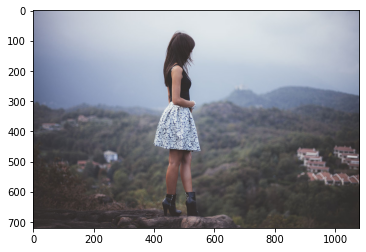

클래스 레이블: 1.0
test_image_1.jpg는 사람입니다.
--------------------


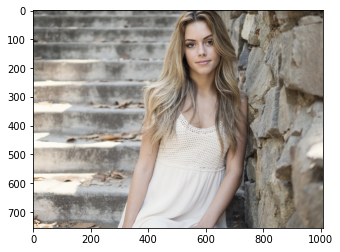

클래스 레이블: 0.0
test_image_2.jpg는 말입니다.
--------------------


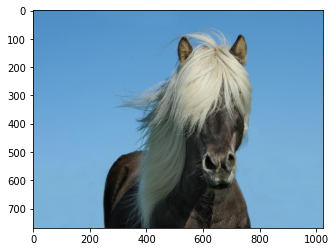

클래스 레이블: 0.0
test_image_3.jpg는 말입니다.
--------------------


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

for fn in test_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(fn))
    plt.show()
    
    # 이미지 불러오기
    img = image.load_img(fn, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    classes = model.predict(x)

    print('클래스 레이블:', classes[0][0])
    if classes[0][0] > 0.5:
      print(fn + "는 사람입니다.")
    else:
      print(fn + "는 말입니다.")
    print('--------------------')